# Python

### Answer: 1 

Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5


In [1]:
def highest_frequency_word_length(string):
    words = string.split()
    word_freq = {}
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    max_freq = 0
    max_word_length = 0
    for word in word_freq:
        if word_freq[word] > max_freq:
            max_freq = word_freq[word]
            max_word_length = len(word)
    return max_word_length

In [2]:
# Test case 1: 
string = "write write write all the number from from from 1 to 100"
# Example output - 5
print(highest_frequency_word_length(string))  

# Test case 2: 
string = "the quick brown fox jumps over the lazy dog"
# Example output - 3
print(highest_frequency_word_length(string)) 

# Test case 3: 
string = ""
# Example output - 0
print(highest_frequency_word_length(string)) 

5
3
0


### Answer: 2

Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO


In [3]:
from collections import Counter

def is_valid_string(s):
    char_counts = Counter(s)  # Count the occurrences of each character
    counts = list(char_counts.values())  # Get the count values
    unique_counts = set(counts)  # Get unique count values

    if len(unique_counts) == 1:
        return "YES"  # All characters appear the same number of times

    if len(unique_counts) == 2:
        # Check if we can remove one character to make all others appear the same number of times
        max_count = max(counts)
        min_count = min(counts)
        if counts.count(max_count) == 1 and max_count - min_count == 1:
            return "NO"  # Removing one character makes the remaining counts equal

# Testing the function with provided examples
print(is_valid_string("abc"))  # Output: YES
print(is_valid_string("abcc"))  # Output: NO

YES
NO


### Answer: 3

Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.


In [4]:
import pandas as pd
import requests

# Function to download data from the provided link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data from {url}")

# Function to process and convert data to a structured format
def process_data(data):
    structured_data = []
    for pokemon in data['pokemon']:
        row = {
            'id': pokemon['id'],
            'num': pokemon['num'],
            'name': pokemon['name'],
            'img': pokemon['img'],
            'type': ','.join(pokemon['type']),
            'height': pokemon['height'],
            'weight': pokemon['weight'],
            'candy': pokemon.get('candy', ''),
            'candy_count': pokemon.get('candy_count', 0),
            'egg': pokemon.get('egg', ''),
            'spawn_chance': pokemon.get('spawn_chance', 0),
            'avg_spawns': pokemon.get('avg_spawns', 0),
            'spawn_time': pokemon.get('spawn_time', ''),
            'weakness': ','.join(pokemon['weaknesses']),
            'next_evolution': ','.join([evolution['num'] + ' ' + evolution['name'] for evolution in pokemon.get('next_evolution', [])]),
            'prev_evolution': ','.join([evolution['num'] + ' ' + evolution['name'] for evolution in pokemon.get('prev_evolution', [])])
        }
        structured_data.append(row)
    return structured_data

# Function to convert structured data to Excel format
def convert_to_excel(data, output_file):
    df = pd.DataFrame(data)
    df.to_excel(output_file, index=False)

# Main program
if __name__ == '__main__':
    link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
    output_file = "pokemon_data.xlsx"

    # Download data from the provided link
    downloaded_data = download_data(link)

    # Process the downloaded data
    processed_data = process_data(downloaded_data)

    # Convert processed data to Excel format
    convert_to_excel(processed_data, output_file)

    print(f"Data has been downloaded, processed, and saved to {output_file} in Excel format.")


Data has been downloaded, processed, and saved to pokemon_data.xlsx in Excel format.


In [5]:
df = pd.read_excel('/content/pokemon_data.xlsx')
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire,Ice,Flying,Psychic","002 Ivysaur,003 Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire,Ice,Flying,Psychic",003 Venusaur,001 Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,"Fire,Ice,Flying,Psychic",NaN,"001 Bulbasaur,002 Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,"Water,Ground,Rock","005 Charmeleon,006 Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,"Water,Ground,Rock",006 Charizard,004 Charmander


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     151 non-null    int64  
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  weakness        151 non-null    object 
 14  next_evolution  70 non-null     object 
 15  prev_evolution  72 non-null     object 
dtypes: float64(2), int64(3), object(11)
memory usage: 19.0+ KB


### Answer: 4


Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.

Expected Output Data Attributes
● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int


In [7]:
import pandas as pd
import requests

# Function to download data from the provided link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data from {url}")

# Function to process and convert data to a structured format
def process_data(data):
    structured_data = []
    for meteorite in data:
        row = {
            'Name of Earth Meteorite': meteorite.get('name', ''),
            'ID of Earth Meteorite': meteorite.get('id', ''),
            'Meteorite Type': meteorite.get('nametype', ''),
            'Recclass': meteorite.get('recclass', ''),
            'Mass (g)': float(meteorite.get('mass (g)', 0)),  # Use default value of 0 if 'mass (g)' key is missing
            'Year': pd.to_datetime(meteorite.get('year', '1900-01-01'), errors='coerce'),  # Convert to datetime format, handle invalid values
            'Latitude': float(meteorite.get('reclat', 0)),  # Use default value of 0 if 'reclat' key is missing
            'Longitude': float(meteorite.get('reclong', 0)),  # Use default value of 0 if 'reclong' key is missing
            'Coordinates': [float(meteorite.get('reclat', 0)), float(meteorite.get('reclong', 0))]  # Use default values of 0 if 'reclat' or 'reclong' keys are missing
        }
        structured_data.append(row)
    return structured_data

# Function to convert structured data to CSV format
def convert_to_csv(data, output_file):
    df = pd.DataFrame(data)
    df.to_csv(output_file, index=False)

# Main program
if __name__ == '__main__':
    link = "https://data.nasa.gov/resource/y77d-th95.json"
    output_file = "meteorite_data.csv"

    # Download data from the provided link
    downloaded_data = download_data(link)

    # Process the downloaded data
    processed_data = process_data(downloaded_data)

    # Convert processed data to CSV format
    convert_to_csv(processed_data, output_file)

    print(f"Data has been downloaded, processed, and saved to {output_file} in CSV format.")


Data has been downloaded, processed, and saved to meteorite_data.csv in CSV format.


In [8]:
a4 = pd.read_csv('/content/meteorite_data.csv')
a4

,Name of Earth Meteorite,ID of Earth Meteorite,Meteorite Type,Recclass,Mass (g),Year,Latitude,Longitude,Coordinates
0,Aachen,1,Valid,L5,0.0,1880-01-01,50.77500,6.08333,"[50.775, 6.08333]"
1,Aarhus,2,Valid,H6,0.0,1951-01-01,56.18333,10.23333,"[56.18333, 10.23333]"
2,Abee,6,Valid,EH4,0.0,1952-01-01,54.21667,-113.00000,"[54.21667, -113.0]"
3,Acapulco,10,Valid,Acapulcoite,0.0,1976-01-01,16.88333,-99.90000,"[16.88333, -99.9]"
4,Achiras,370,Valid,L6,0.0,1902-01-01,-33.16667,-64.95000,"[-33.16667, -64.95]"
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,0.0,1934-01-01,13.63333,79.41667,"[13.63333, 79.41667]"
996,Tissint,54823,Valid,Martian (shergottite),0.0,2011-01-01,29.48195,-7.61123,"[29.48195, -7.61123]"
997,Tjabe,24011,Valid,H6,0.0,1869-01-01,-7.08333,111.53333,"[-7.08333, 111.53333]"
998,Tjerebon,24012,Valid,L5,0.0,1922-01-01,-6.66667,106.58333,"[-6.66667, 106.58333]"


In [9]:
a4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name of Earth Meteorite  1000 non-null   object 
 1   ID of Earth Meteorite    1000 non-null   int64  
 2   Meteorite Type           1000 non-null   object 
 3   Recclass                 1000 non-null   object 
 4   Mass (g)                 1000 non-null   float64
 5   Year                     983 non-null    object 
 6   Latitude                 1000 non-null   float64
 7   Longitude                1000 non-null   float64
 8   Coordinates              1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


### Answer: 5


Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding


In [10]:
import requests
import json

# API link to fetch data
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# sending GET request and storing the response
response = requests.get(url)

# extracting JSON data from the response
data = response.json()

# Accessing the 'episodes' key from the JSON data
episodes = data['_embedded']['episodes']

# Looping through each episode and extracting the necessary data attributes
for episode in episodes:
    id = episode['id']
    url = episode['url']
    name = episode['name']
    season = episode['season']
    number = episode['number']
    type = episode['type']
    airdate = episode['airdate']
    airtime = episode['airtime']
    runtime = episode['runtime']
    rating = episode['rating']['average']
    summary = episode['summary']
    medium_image_link = episode['image']['medium']
    original_image_link = episode['image']['original']

    # removing HTML tags from summary
    summary = summary.replace('<p>', '').replace('</p>', '')

    # Formatting the output
    output = f"ID: {id}\nURL: {url}\nName: {name}\nSeason: {season}\nNumber: {number}\nType: {type}\nAirdate: {airdate}\nAirtime: {airtime}\nRuntime: {runtime} minutes\nAverage Rating: {rating}\nSummary: {summary}\nMedium Image Link: {medium_image_link}\nOriginal Image Link: {original_image_link}\n"

    # printing the output
    print(output)

ID: 869671
URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68 minutes
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg

ID: 911201
URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Name: Chestnut
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60 minutes
Average Rating: 7.7
Summary: Bernard suspects that someone is sabotaging the hosts. Meanwhi

Answer: 6

Using the data:
 Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
write code to analyze the data and answer the following questions
 Note  1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.

2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.


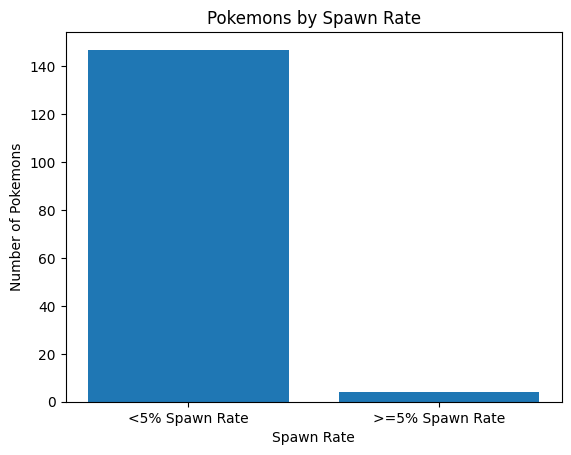

In [11]:
import requests
import matplotlib.pyplot as plt

# Function to download data from the provided link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data from {url}")

# Function to analyze the Pokemon data and return the results
def analyze_data(pokemon_data):
    low_spawn_rate_pokemon = []
    less_weakness_pokemon = []
    no_multiplier_pokemon = []
    less_evolutions_pokemon = []
    less_spawn_time_pokemon = []
    more_than_two_types_pokemon = []

    for pokemon in pokemon_data['pokemon']:
        # Get all Pokemons whose spawn rate is less than 5%
        if pokemon.get('spawn_chance', 0) < 5:
            low_spawn_rate_pokemon.append(pokemon)

        # Get all Pokemons that have less than 4 weaknesses
        if len(pokemon.get('weaknesses', [])) < 4:
            less_weakness_pokemon.append(pokemon)

        # Get all Pokemons that have no multipliers at all
        if not pokemon.get('multipliers'):
            no_multiplier_pokemon.append(pokemon)

        # Get all Pokemons that do not have more than 2 evolutions
        if len(pokemon.get('next_evolution', [])) <= 2:
            less_evolutions_pokemon.append(pokemon)

        # Get all Pokemons whose spawn time is less than 300 seconds
        if pokemon.get('spawn_time', '') < '300':
            less_spawn_time_pokemon.append(pokemon)

        # Get all Pokemon who have more than two types of capabilities
        if len(pokemon.get('type', [])) > 2:
            more_than_two_types_pokemon.append(pokemon)

    return (
        low_spawn_rate_pokemon,
        less_weakness_pokemon,
        no_multiplier_pokemon,
        less_evolutions_pokemon,
        less_spawn_time_pokemon,
        more_than_two_types_pokemon
    )

# Function to plot a bar chart
def plot_bar_chart(x_labels, y_values, x_label, y_label, title):
    plt.bar(x_labels, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Main program
if __name__ == '__main__':
    link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

    # Download data from the provided link
    pokemon_data = download_data(link)

    # Analyze the Pokemon data
    (
        low_spawn_rate_pokemon,
        less_weakness_pokemon,
        no_multiplier_pokemon,
        less_evolutions_pokemon,
        less_spawn_time_pokemon,
        more_than_two_types_pokemon
    ) = analyze_data(pokemon_data)

    # Plotting the number of Pokemons with low spawn rate
    spawn_rate_labels = ['<5% Spawn Rate', '>=5% Spawn Rate']
    spawn_rate_values = [len(low_spawn_rate_pokemon), len(pokemon_data['pokemon']) - len(low_spawn_rate_pokemon)]
    plot_bar_chart(spawn_rate_labels, spawn_rate_values, 'Spawn Rate', 'Number of Pokemons', 'Pokemons by Spawn Rate')

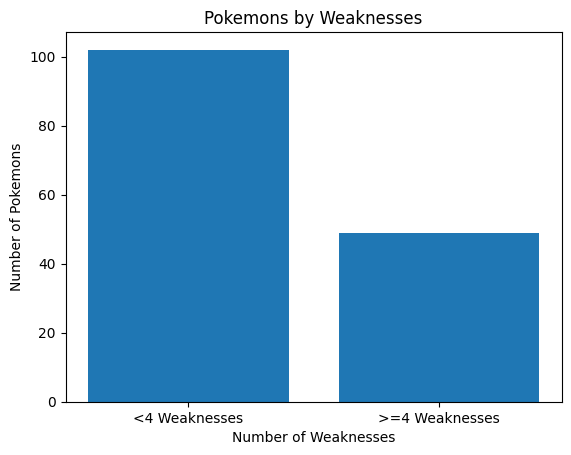

In [12]:
# Plotting the number of Pokemons with less than 4 weaknesses
weaknesses_labels = ['<4 Weaknesses', '>=4 Weaknesses']
weaknesses_values = [len(less_weakness_pokemon), len(pokemon_data['pokemon']) - len(less_weakness_pokemon)]
plot_bar_chart(weaknesses_labels, weaknesses_values, 'Number of Weaknesses', 'Number of Pokemons', 'Pokemons by Weaknesses')

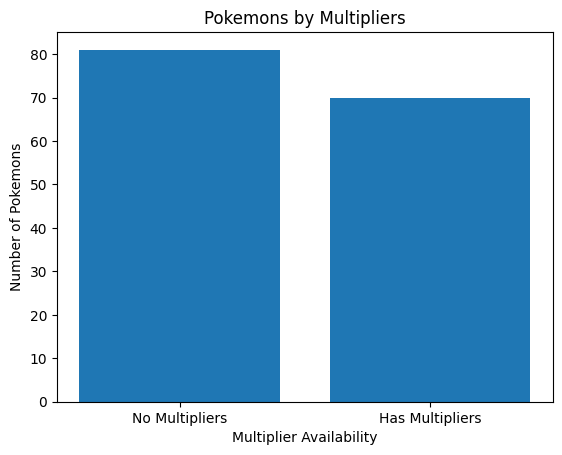

In [13]:
# Plotting the number of Pokemons with no multipliers
multiplier_labels = ['No Multipliers', 'Has Multipliers']
multiplier_values = [len(no_multiplier_pokemon), len(pokemon_data['pokemon']) - len(no_multiplier_pokemon)]
plot_bar_chart(multiplier_labels, multiplier_values, 'Multiplier Availability', 'Number of Pokemons', 'Pokemons by Multipliers')

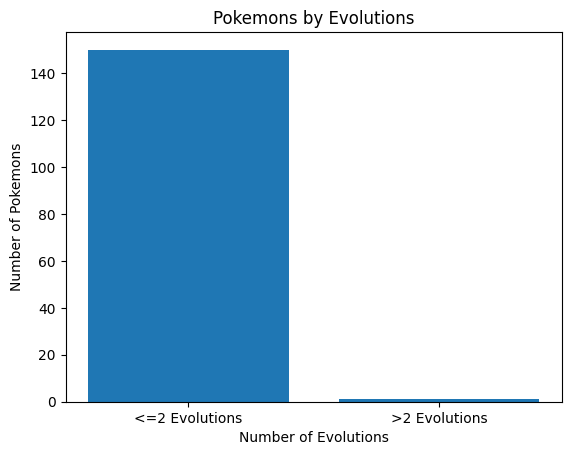

In [14]:
# Plotting the number of Pokemons with less than or equal to 2 evolutions
evolutions_labels = ['<=2 Evolutions', '>2 Evolutions']
evolutions_values = [len(less_evolutions_pokemon), len(pokemon_data['pokemon']) - len(less_evolutions_pokemon)]
plot_bar_chart(evolutions_labels, evolutions_values, 'Number of Evolutions', 'Number of Pokemons', 'Pokemons by Evolutions')

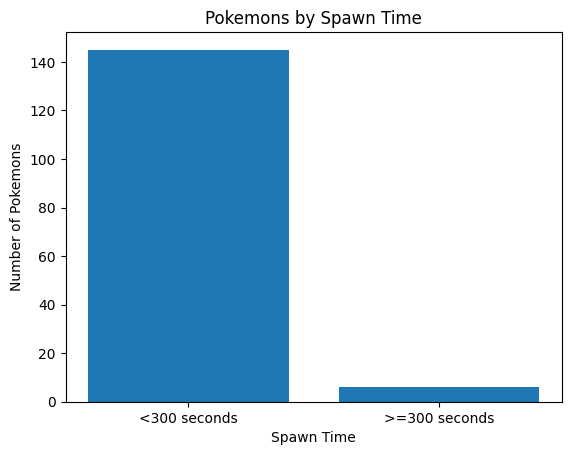

In [15]:
# Plotting the number of Pokemons with spawn time less than 300 seconds
spawn_time_labels = ['<300 seconds', '>=300 seconds']
spawn_time_values = [len(less_spawn_time_pokemon), len(pokemon_data['pokemon']) - len(less_spawn_time_pokemon)]
plot_bar_chart(spawn_time_labels, spawn_time_values, 'Spawn Time', 'Number of Pokemons', 'Pokemons by Spawn Time')

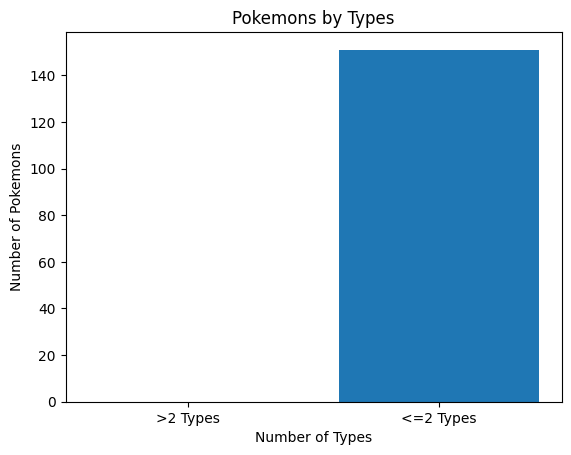

In [16]:
# Plotting the number of Pokemons with more than two types of capabilities
types_labels = ['>2 Types', '<=2 Types']
types_values = [len(more_than_two_types_pokemon), len(pokemon_data['pokemon']) - len(more_than_two_types_pokemon)]
plot_bar_chart(types_labels, types_values, 'Number of Types', 'Number of Pokemons', 'Pokemons by Types')

### Answer: 7

Using the data
Link - https://data.nasa.gov/resource/y77d-th95.json
 write code to analyze the data and answer the following questions 
Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000 kg

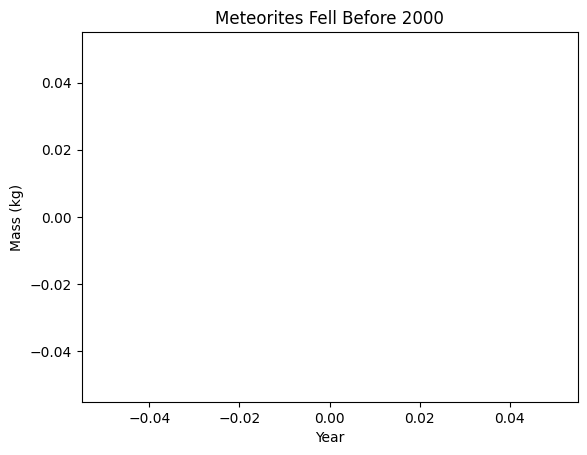

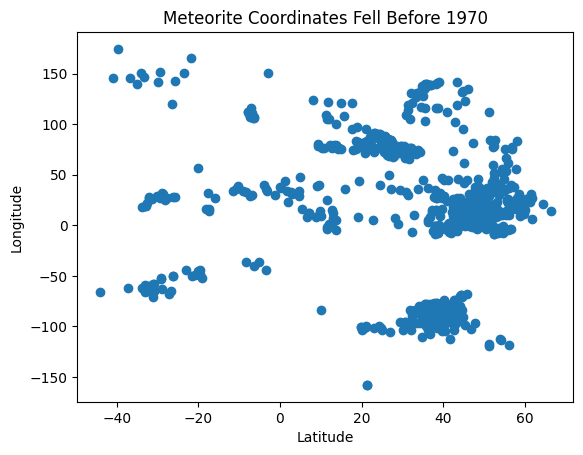

In [17]:
import requests
import matplotlib.pyplot as plt

# Function to download data from the provided link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data from {url}")

# Function to analyze the meteorite data and return the results
def analyze_data(meteorite_data):
    before_2000_meteorites = []
    before_1970_coordinates = []
    mass_above_10000kg_meteorites = []

    for meteorite in meteorite_data:
        # Get all the Earth meteorites that fell before the year 2000
        if 'year' in meteorite and int(meteorite['year'][:4]) < 2000:
            before_2000_meteorites.append(meteorite)

        # Get all the Earth meteorite coordinates that fell before the year 1970
        if 'reclat' in meteorite and 'reclong' in meteorite:
            year = meteorite.get('year_recovered', meteorite.get('year', ''))
            if year and int(year[:4]) < 1970:
                coordinates = (float(meteorite['reclat']), float(meteorite['reclong']))
                before_1970_coordinates.append(coordinates)

        # Assuming mass is in grams, get all the Earth meteorites with mass above 10000 grams (10 kg)
        if 'mass (g)' in meteorite and int(meteorite['mass (g)']) > 10000:
            mass_above_10000kg_meteorites.append(meteorite)

    return (
        before_2000_meteorites,
        before_1970_coordinates,
        mass_above_10000kg_meteorites
    )

# Function to plot a scatter plot
def plot_scatter_plot(x_values, y_values, x_label, y_label, title):
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Main program
if __name__ == '__main__':
    link = "https://data.nasa.gov/resource/y77d-th95.json"

    # Download data from the provided link
    meteorite_data = download_data(link)

    # Analyze the meteorite data
    (
        before_2000_meteorites,
        before_1970_coordinates,
        mass_above_10000kg_meteorites
    ) = analyze_data(meteorite_data)

    # Plotting the year vs. mass for meteorites fell before 2000
    years = []
    masses = []
    for meteorite in before_2000_meteorites:
        year = meteorite.get('year', '')
        mass = meteorite.get('mass (g)', '')
        if year and mass:
            if int(year[:4]) < 2000: # Include all meteorites before year 2000
                years.append(int(year[:4]))
                masses.append(int(mass) / 1000)

    plot_scatter_plot(years, masses, 'Year', 'Mass (kg)', 'Meteorites Fell Before 2000')

    # Plotting the latitude vs. longitude for meteorites fell before 1970
    latitudes = [float(coordinates[0]) for coordinates in before_1970_coordinates]
    longitudes = [float(coordinates[1]) for coordinates in before_1970_coordinates]
    plot_scatter_plot(latitudes, longitudes, 'Latitude', 'Longitude', 'Meteorite Coordinates Fell Before 1970')

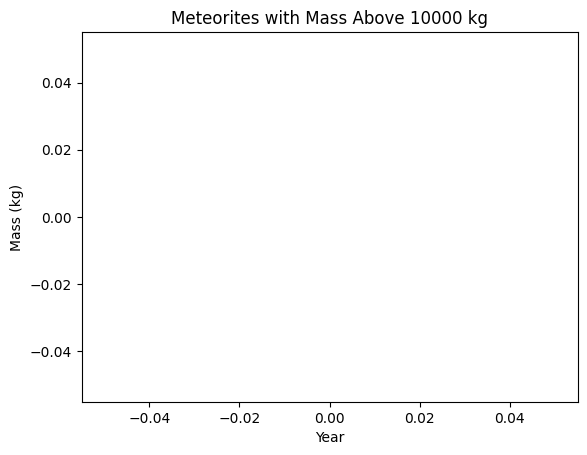

In [18]:
# Plotting the year vs. mass for meteorites with mass above 10000 grams
years_above_10000kg = []
masses_above_10000kg = []
for meteorite in mass_above_10000kg_meteorites:
    year = meteorite.get('year', '')
    mass = meteorite.get('mass (g)', '')
    if year and mass:
        if int(mass) > 10000000: # Include all meteorites with mass above 10000 kg (10000000 g)
            years_above_10000kg.append(int(year[:4]))
            masses_above_10000kg.append(int(mass) / 1000)

plot_scatter_plot(years_above_10000kg, masses_above_10000kg, 'Year', 'Mass (kg)', 'Meteorites with Mass Above 10000 kg')

Answer: 8

Using the data
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
 write code the analyze the data and answer the following questions 
Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season


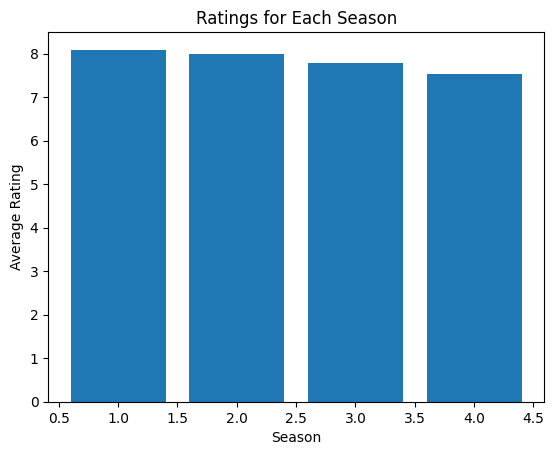

In [19]:
import requests
import matplotlib.pyplot as plt

# Function to download data from the provided link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data from {url}")

# Function to analyze the TV show data and return the results
def analyze_data(show_data):
    season_ratings = {}  # To store overall ratings for each season
    episode_names_high_rating = {}  # To store episode names with average rating > 8 for each season
    episode_names_before_may_2019 = {}  # To store episode names aired before May 2019 for each season
    episode_names_highest_rating = {}  # To store episode names with the highest rating for each season
    episode_names_lowest_rating = {}  # To store episode names with the lowest rating for each season
    episode_summary_popular = {}  # To store summary of the most popular episode in each season

    for episode in show_data['_embedded']['episodes']:
        season = episode['season']
        rating = float(episode['rating']['average'])
        name = episode['name']
        airdate = episode['airdate']
        summary = episode['summary']

        # Get overall ratings for each season
        if season in season_ratings:
            season_ratings[season].append(rating)
        else:
            season_ratings[season] = [rating]

        # Get episode names with average rating > 8 for each season
        if rating > 8:
            if season in episode_names_high_rating:
                episode_names_high_rating[season].append(name)
            else:
                episode_names_high_rating[season] = [name]

        # Get episode names aired before May 2019 for each season
        if airdate < '2019-05-01':
            if season in episode_names_before_may_2019:
                episode_names_before_may_2019[season].append(name)
            else:
                episode_names_before_may_2019[season] = [name]

        # Get the episode name with the highest rating for each season
        if season in episode_names_highest_rating:
            if rating > episode_names_highest_rating[season]['rating']:
                episode_names_highest_rating[season] = {'name': name, 'rating': rating}
        else:
            episode_names_highest_rating[season] = {'name': name, 'rating': rating}

        # Get the episode name with the lowest rating for each season
        if season in episode_names_lowest_rating:
            if rating < episode_names_lowest_rating[season]['rating']:
                episode_names_lowest_rating[season] = {'name': name, 'rating': rating}
        else:
            episode_names_lowest_rating[season] = {'name': name, 'rating': rating}

        # Get the summary of the most popular episode in each season
        if season in episode_summary_popular:
            if rating > episode_summary_popular[season]['rating']:
                episode_summary_popular[season] = {'name': name, 'rating': rating, 'summary': summary}
        else:
            episode_summary_popular[season] = {'name': name, 'rating': rating, 'summary': summary}

    return (
        season_ratings,
        episode_names_high_rating,
        episode_names_before_may_2019,
        episode_names_highest_rating,
        episode_names_lowest_rating,
        episode_summary_popular
    )

# Function to plot the ratings for each season
def plot_season_ratings(season_ratings):
    seasons = list(season_ratings.keys())
    ratings = [sum(season_ratings[season])/len(season_ratings[season]) for season in seasons]

    plt.bar(seasons, ratings)
    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.title('Ratings for Each Season')
    plt.show()

# Function to print the episode names for each season
def print_episode_names(episode_names):
    for season, names in episode_names.items():
        print(f"Season {season} - Episode Names:")
        for name in names:
            print(name)
        print()

# Function to print the episode names with highest and lowest ratings for each season
def print_episode_ratings(episode_ratings, rating_type):
    for season, episode in episode_ratings.items():
        print(f"Season {season} - {rating_type} Rated Episode:")
        print(f"Episode Name: {episode['name']}")
        print(f"Rating: {episode['rating']}")
        print()

# Function to print the summary of the most popular episode in each season
def print_most_popular_episode(episode_summary):
    for season, episode in episode_summary.items():
        print(f"Season {season} - Most Popular Episode:")
        print(f"Episode Name: {episode['name']}")
        print(f"Rating: {episode['rating']}")
        print(f"Summary: {episode['summary']}")
        print()

# Main program
if __name__ == '__main__':
    link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

    # Download data from the provided link
    show_data = download_data(link)

    # Analyze the TV show data
    (
        season_ratings,
        episode_names_high_rating,
        episode_names_before_may_2019,
        episode_names_highest_rating,
        episode_names_lowest_rating,
        episode_summary_popular
    ) = analyze_data(show_data)

    # Plot the ratings for each season
    plot_season_ratings(season_ratings)

In [20]:
 # Print the episode names with average rating > 8 for each season
print("Episode Names with Average Rating > 8:")
print_episode_names(episode_names_high_rating)

Episode Names with Average Rating > 8:
Season 1 - Episode Names:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 - Episode Names:
Kiksuya
Vanishing Point
The Passenger



In [21]:
# Print the episode names aired before May 2019 for each season
print("Episode Names Aired Before May 2019:")
print_episode_names(episode_names_before_may_2019)

Episode Names Aired Before May 2019:
Season 1 - Episode Names:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind

Season 2 - Episode Names:
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger



In [22]:
# Print the episode names with the highest and lowest ratings for each season
print_episode_ratings(episode_names_highest_rating, "Highest")
print_episode_ratings(episode_names_lowest_rating, "Lowest")

Season 1 - Highest Rated Episode:
Episode Name: The Bicameral Mind
Rating: 8.7

Season 2 - Highest Rated Episode:
Episode Name: Kiksuya
Rating: 8.7

Season 3 - Highest Rated Episode:
Episode Name: Parce Domine
Rating: 8.0

Season 4 - Highest Rated Episode:
Episode Name: Zhuangzi
Rating: 7.8

Season 1 - Lowest Rated Episode:
Episode Name: The Stray
Rating: 7.6

Season 2 - Lowest Rated Episode:
Episode Name: Akane No Mai
Rating: 7.6

Season 3 - Lowest Rated Episode:
Episode Name: Decoherence
Rating: 7.5

Season 4 - Lowest Rated Episode:
Episode Name: The Auguries
Rating: 7.1



In [23]:
# Print the summary of the most popular episode in each season
print_most_popular_episode(episode_summary_popular)

Season 1 - Most Popular Episode:
Episode Name: The Bicameral Mind
Rating: 8.7
Summary: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>

Season 2 - Most Popular Episode:
Episode Name: Kiksuya
Rating: 8.7
Summary: <p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>

Season 3 - Most Popular Episode:
Episode Name: Parce Domine
Rating: 8.0
Summary: <p>If you're stuck in a loop, try walking in a straight line.</p>

Season 4 - Most Popular Episode:
Episode Name: Zhuangzi
Rating: 7.8
Summary: <p>God is bored.</p>



### Answer 9

Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type


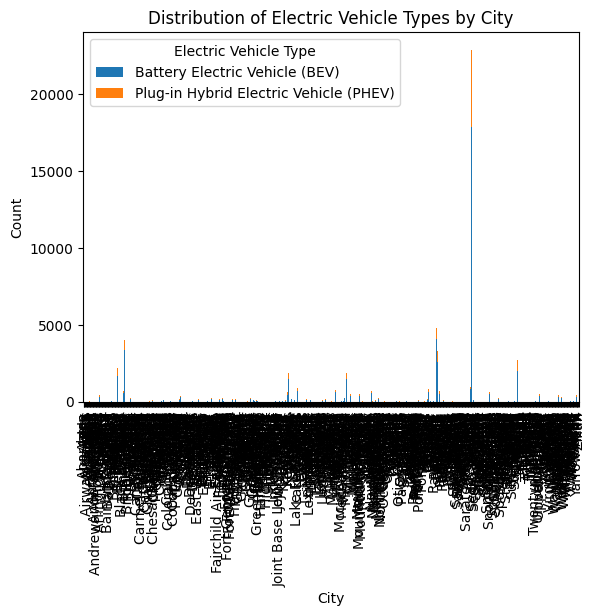

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicles
not_clean_cars = df.loc[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No', ['Make', 'Model']]

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_bothell = df.loc[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL'),
                            ['Model Year', 'Model']]

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_100_range = df.loc[(df['Electric Range'] > 100) & (df['Model Year'] > 2015),
                                 ['Make', 'Model Year', 'Model']]

# Draw plots to show the distribution between city and electric vehicle type
city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)
city_ev_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.show()

# # Print the results
# print("Cars and Types that do not qualify for clean alternative fuel vehicles:")
# print(not_clean_cars)

# print("\nTESLA cars with model year and model type made in Bothell City:")
# print(tesla_cars_bothell)

# print("\nCars with electric range > 100 and made after 2015:")
# print(electric_cars_100_range)


In [25]:
print("Cars and Types that do not qualify for clean alternative fuel vehicles:")
print(not_clean_cars)

Cars and Types that do not qualify for clean alternative fuel vehicles:
Empty DataFrame
Columns: [Make, Model]
Index: []


In [26]:
print("\nTESLA cars with model year and model type made in Bothell City:")
print(tesla_cars_bothell)


TESLA cars with model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []


In [27]:
print("\nCars with electric range > 100 and made after 2015:")
electric_cars_100_range


Cars with electric range > 100 and made after 2015:


,Make,Model Year,Model
0,TESLA,2018,MODEL X
2,TESLA,2019,MODEL 3
4,TESLA,2017,MODEL S
12,TESLA,2020,MODEL 3
13,TESLA,2020,MODEL 3
...,...,...,...
130417,TESLA,2020,MODEL Y
130428,NISSAN,2018,LEAF
130432,TESLA,2020,MODEL Y
130436,TESLA,2018,MODEL 3


### Answer 10:
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.


In [28]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Tag the words with their respective part-of-speech
    tagged_words = pos_tag(words)
    
    # Initialize counts
    counts = {'verb': 0, 'noun': 0, 'pronoun': 0, 'adjective': 0}
    
    # Count the number of verbs, nouns, pronouns, and adjectives
    for word, tag in tagged_words:
        if tag.startswith('VB'):
            counts['verb'] += 1
        elif tag.startswith('NN'):
            counts['noun'] += 1
        elif tag.startswith('PRP'):
            counts['pronoun'] += 1
        elif tag.startswith('JJ'):
            counts['adjective'] += 1
    
    return counts

# Example usage
phrase = "I love eating delicious food."
counts = count_pos_tags(phrase)
print(counts)

LookupError: ignored

In [ ]:
text = "She is reading an interesting book"
pos_count = count_pos_tags(text)
print(pos_count)

In [ ]:
text = "The cat jumped over the lazy dog."
pos_count = count_pos_tags(text)
print(pos_count)

# Statistics

### Answer 6: -->
A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. The company wants to know if the change
in blood pressure follows a normal distribution.


### Answer 7:
 The equations of two lines of regression, obtained in a correlation analysis
between variables X and Y are as follows:
and . 2𝑋 + 3 − 8 = 0 2𝑌 + 𝑋 − 5 = 0 The variance of 𝑋 = 4 Find the
a. Variance of Y
b. Coefficient of determination of C and Y
c. Standard error of estimate of X on Y and of Y on X.


In [29]:
import math

# Given data
var_x = 4

# Regression lines
slope_yx = -1/2
intercept_yx = 5/2
slope_xy = 0
intercept_xy = 5/2

# a. Variance of Y
var_y = var_x * slope_yx ** 2 + 1
print('Variance of Y:', var_y)

# b. Coefficient of determination of C and Y
r_squared = slope_yx ** 2 * var_x / (var_y * 1)
print('Coefficient of determination between X and Y:', r_squared)

# c. Standard error of estimate of X on Y and of Y on X
data = [(130, 63), (142, 67), (120, 63), (135, 67), (148, 70)] # Using the data from previous problem

sse_yx = sum([(y - slope_yx * x - intercept_yx) ** 2 for x, y in data])
se_yx = math.sqrt(sse_yx / (len(data) - 2) * (1 - r_squared))
print('Standard error of estimate of X on Y:', se_yx)

sse_xy = sum([(x - slope_xy * y - intercept_xy) ** 2 for x, y in data])
se_xy = math.sqrt(sse_xy / (len(data) - 2) * (1 - r_squared))
print('Standard error of estimate of Y on X:', se_xy)

Variance of Y: 2.0
Coefficient of determination between X and Y: 0.5
Standard error of estimate of X on Y: 119.77548441424341
Standard error of estimate of Y on X: 121.27740240182148


### Answer 8:

The anxiety levels of 10 participants were measured before and after a new therapy.
The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether
the therapy had a significant effect on anxiety levels. The data is given below: Participant
Before therapy After therapy Difference


In [30]:
import pandas as pd
from scipy.stats import wilcoxon

# Read the dataset
data = {
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Before therapy': [10, 8, 12, 15, 6, 9, 11, 7, 14, 10],
    'After therapy': [7, 6, 10, 12, 5, 8, 9, 6, 12, 8],
    'Difference': [-3, -2, -2, -3, -1, -1, -2, -1, -2, -2]
}

df = pd.DataFrame(data)

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(df['Difference'])

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The therapy had a significant effect on anxiety levels.")
else:
    print("The therapy did not have a significant effect on anxiety levels.")


The therapy had a significant effect on anxiety levels.


### Answer 9:
Test the hypothesis that the mean scores of all the students are the same. If not, name the
student with the highest score.


In [31]:
import pandas as pd
from scipy.stats import f_oneway

# Create a DataFrame with the given data
data = {
    'Name': ['Karan', 'Deepa', 'Karthik', 'Chandan', 'Jeevan'],
    'Exam 1': [85, 70, 90, 75, 95],
    'Exam 2': [90, 80, 85, 70, 92],
    'Exam 3': [92, 85, 88, 75, 96]
}

df = pd.DataFrame(data)

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(df['Exam 1'], df['Exam 2'], df['Exam 3'])

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The mean scores of the students are not the same.")
    
    # Find the student with the highest score
    highest_score_student = df['Name'][df[['Exam 1', 'Exam 2', 'Exam 3']].sum(axis=1).idxmax()]
    print("The student with the highest score is:", highest_score_student)
else:
    print("The mean scores of the students are the same.")

The mean scores of the students are the same.


In [32]:
from scipy.stats import f_oneway

# Define the data
exam1 = [85, 70, 90, 75, 95]
exam2 = [90, 80, 85, 70, 92]
exam3 = [92, 85, 88, 75, 96]

# Perform the ANOVA test
f_stat, p_val = f_oneway(exam1, exam2, exam3)

# Print the results
print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 0.3236947791164659
p-value: 0.7295954253321559


###  Answer 11:->

Given the data of a feature contributing to different classes


### Answer: 12
A pharmaceutical company develops a new drug and wants to compare its
effectiveness against a standard drug for treating a particular condition. They conduct a
study with two groups: Group A receives the new drug, and Group B receives the standard
drug. The company measures the improvement in a specific symptom for both groups after
a 4-week treatment period.
a. The company collects data from 30 patients in each group and calculates the
mean improvement score and the standard deviation of improvement for each
group. The mean improvement score for Group A is 2.5 with a standard
deviation of 0.8, while the mean improvement score for Group B is 2.2 with a
standard deviation of 0.6. Conduct a t-test to determine if there is a significant
difference in the mean improvement scores between the two groups. Use a
significance level of 0.05.
b. Based on the t-test results, state whether the null hypothesis should be
rejected or not. Provide a conclusion in the context of the study.


In [33]:
import numpy as np
from scipy.stats import ttest_ind

# Define the data
group_a = np.array([2.5]*30) + np.random.normal(loc=0, scale=0.8, size=30)
group_b = np.array([2.2]*30) + np.random.normal(loc=0, scale=0.6, size=30)

# Perform the t-test
t_stat, p_val = ttest_ind(group_a, group_b)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 1.1186604537421394
p-value: 0.26789681416147515
